In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import time
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## **MAIN CODE to get the rating and number of votes for each album**

In [152]:
df_ratings_scrapped = pd.read_csv('Datasets/df_ratings.csv')
start_id = df_ratings_scrapped['album_id'].iloc[-1]
start_id

154801

In [153]:
df_ratings_less_30 = pd.read_csv('Datasets/df_ratings_less_30.csv', keep_default_na=False)
df_ratings_less_30['album_id'].iloc[-1]

51230

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import ftfy   # to fix names with unusual characters

df_ratings_scrapped = pd.read_csv('Datasets/df_ratings.csv', keep_default_na=False)
df_ratings_less_30 = pd.read_csv('Datasets/df_ratings_less_30.csv', keep_default_na=False)

album_id_list = []
artists_list = []
albums_list = []
avg_rating_list = []
number_of_votes_list = []

count = 0
scrapped = 0

start_id = df_ratings_less_30['album_id'].iloc[-1]
# start_id = df_ratings_scrapped['album_id'].iloc[-1]

for album_id in range(start_id+1,start_id+20000):
    count+=1

    if album_id in df_ratings_scrapped['album_id'].values:
        print(f'{scrapped}/{count} - id {album_id}: album already scrapped')
        continue  # Skip this album, I already have it

    url = f'https://www.sputnikmusic.com/soundoff.php?albumid={album_id}'
    response = requests.get(f"{url}")
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extract artist and album name
    info = soup.select('table tr')
    try:
        artist_name = info[2].text.split('dig it')[0].split('new music')[1].split('\xa0\xa0\xa0')[0].split('\n\n\n\n\n\n\n\n\n\n')[1]
        album = info[2].text.split('dig it')[0].split('new music')[1].split('\xa0\xa0\xa0')[1]
        album_name = ftfy.fix_text(album)     # fix the name 
    except IndexError:
        print(f"{scrapped}/{count} - id {album_id}: error")
        continue  # Skip this album if the info isn't formatted as expected
    if artist_name == '':
        print(f"{scrapped}/{count} - id {album_id}: No artist found")
        continue  # Skip this album if the info isn't formatted as expected

    print(f'{scrapped}/{count} - id {album_id}: {artist_name} - {album_name}')

    # Get ratings
    rating = soup.select('font.reviewheading b')
    ratings_list = []

    for r in rating:
        if len(r.text) == 3:  # Only consider ratings with 3 characters (like "4.5")
            ratings_list.append(r.text)

    # Convert to float
    rating_floats = [float(num) for num in ratings_list]
    
    if rating_floats:
        number_of_votes = len(rating_floats) # calculate the number of votes
        number_of_votes_list.append(number_of_votes) # save it in a list

        album_id_list.append(album_id)
        artists_list.append(artist_name)
        albums_list.append(album_name)

        avg_rating = round(np.mean(rating_floats),2) # calculate the avg rating
        avg_rating_list.append(avg_rating) # save it in a list

        scrapped+=1
    else:
        print(f"{scrapped}/{count} - id {album_id}: No valid ratings found.")

0/1 - id 41232: Keller Williams - Dream
1/2 - id 41233: Keller Williams - Odd
2/3 - id 41234: No artist found
2/4 - id 41235: Talkdemonic - Mutiny Sunshine
3/5 - id 41236: album already scrapped
3/6 - id 41237: album already scrapped
3/7 - id 41238: Machine Head - Year of the Dragon
4/8 - id 41239: album already scrapped
4/9 - id 41240: Language Room - One By One
5/10 - id 41241: album already scrapped
5/11 - id 41242: Maras - Raskol
6/12 - id 41243: Carra - Borderline
7/13 - id 41244: E-603 - Torn Up
8/14 - id 41245: Blood Of Our Enemies - Eyes Of A Dead Traitor
9/15 - id 41246: Die Mannequin - Fino + Bleed
10/16 - id 41247: No artist found
10/17 - id 41248: No artist found
10/18 - id 41249: album already scrapped
10/19 - id 41250: No artist found
10/20 - id 41251: album already scrapped
10/21 - id 41252: Spun In Darkness - Birthright
11/22 - id 41253: De Magia Veterum - Migdal Bavel
12/23 - id 41254: Marta Sui Tubi - Muscoli e dei
13/24 - id 41255: album already scrapped
13/25 - id 4

In [142]:
(47*60+48)/5000

0.5736

## **Saving the data**

In [142]:
lists = [('album_id', album_id_list)
        , ('artists', artists_list)
         , ('albums', albums_list)
         , ('avg_rating', avg_rating_list)
         , ('number_of_votes', number_of_votes_list)
         ]

for name, lst in lists:
    print(f'{name}: {len(lst)}') # check that all lists have the same length (even though I had make sure with the previous code)

album_id: 6564
artists: 6564
albums: 6564
avg_rating: 6564
number_of_votes: 6564


In [145]:
# the new df with the artists I just scrapped
data = pd.DataFrame({'album_id': album_id_list
                    , 'artist': artists_list
                    , 'album': albums_list
                    , 'rating': avg_rating_list
                    , 'votes': number_of_votes_list})
print(f'{data.shape[0]} releases\n{data.artist.nunique()} different artists')

6564 releases
4315 different artists


In [146]:
print(f'{round(scrapped / count*100, 2)}% of the albums with < 30 votes\n{scrapped} of {count} actual valid albums')

65.65% of the albums with < 30 votes
6564 of 9999 actual valid albums


In [111]:
# print(f'{data[data['votes']<30].shape[0]} albums with < 30 votes, meaning {round((data[data['votes']<30].shape[0] / data.shape[0])*100,2)}% of the albums \n{data[data['votes']>30].shape[0]} of {data.shape[0]} actual valid albums')

In [147]:
data.sort_values('votes', ascending=False).head(10)

,album_id,artist,album,rating,votes
4723,48567,Photek,Form And Function,3.77,31
888,42710,Negativland,Escape From Noise,3.62,30
3612,46924,Rick James,Come Get It!,3.75,30
4093,47658,The County Medical Examiners,Olidous Operettas,3.62,30
3132,46211,Ringo Starr,Y Not,2.45,30
578,42210,Earth from Above,Numbered With The Transgressors,3.27,30
6117,50572,Downthesun,Downthesun,3.33,30
2191,44791,Comity,The Deus Ex-Machina As A Forgotten Genius (And...,3.73,30
3174,46266,Nathan Fake,Drowning in a Sea of Love,3.98,30
2137,44706,Here We Go Magic,Here We Go Magic,3.43,30


## **Concat with the df of the albums previously scrapped with less than 30 votes**

In [148]:
df_ratings_scrapped = pd.read_csv('Datasets/df_ratings_less_30.csv')
df_ratings_scrapped.shape

(16778, 5)

In [149]:
df_ratings_less_30 = pd.concat([df_ratings_scrapped, data])
df_ratings_less_30.reset_index(drop=True, inplace=True)
df_ratings_less_30.shape

(23342, 5)

In [150]:
print(f'{df_ratings_less_30.shape[0]} albums\n{df_ratings_less_30.artist.nunique()} different artists')

23342 albums
12635 different artists


In [151]:
df_ratings_less_30.to_csv('Datasets/df_ratings_less_30.csv', index=False)

## **Concat with the df of the ratings previously scrapped**

In [130]:
df_ratings_scrapped = pd.read_csv('Datasets/df_ratings.csv')
df_ratings_scrapped.shape

(26084, 5)

In [131]:
df_ratings = pd.concat([df_ratings_scrapped, data])
df_ratings.reset_index(drop=True, inplace=True)
df_ratings.shape

(45519, 5)

In [ ]:
# deleting albums with less than 30 votes
# df_ratings = df_ratings[df_ratings['votes']>30]
# df_ratings.reset_index(drop=True, inplace=True)
# df_ratings.shape

(27494, 5)

In [133]:
print(f'{df_ratings.shape[0]} albums\n{df_ratings.artist.nunique()} different artists')

27494 albums
8437 different artists


In [134]:
print(f'{round((df_ratings[df_ratings['votes']<50].shape[0] / df_ratings.shape[0])*100,2)}% of the albums have less than 50 votes')

26.41% of the albums have less than 50 votes


## **Exporting to csv (and importing in case needed)**

In [135]:
df_ratings.to_csv('Datasets/df_ratings.csv', index=False)

In [ ]:
# in case I have to import it again
# df_ratings = pd.read_csv('Datasets/df_ratings.csv', keep_default_na=False)

In [120]:
df_ratings[df_ratings['album'].isna()]

,album_id,artist,album,rating,votes
15417,35979,Meshuggah,NaN,3.78,314


In [ ]:
# df_ratings.iloc[15417]['album']

'None'

In [ ]:
# replace the null values for the actual name of the album
# df_ratings['album'] = np.where(df_ratings['album_id']==35979, 'None' , df_ratings['album'])
# df_ratings.iloc[15417]['album']

'None'

## **Statistics**

**Top rated albums**

In [71]:
df_ratings.sort_values(['rating', 'votes'], ascending=False).query('votes>100').head(10)

,album_id,artist,album,rating,votes
11679,23820,Sigur Ros,Heima (DVD),4.65,388
381,531,Pink Floyd,Wish You Were Here,4.63,7065
16810,40844,Pink Floyd,Live At Pompeii,4.62,363
1680,2532,Deep Purple,Made In Japan,4.61,513
6901,11956,The Who,Live at Leeds (Deluxe Edition),4.59,184
23567,92289,Dir En Grey,Uroboros (Remastered & Expanded),4.59,124
1090,1448,Nas,Illmatic,4.58,3844
1281,1760,Wu-Tang Clan,Enter the Wu-Tang (36 Chambers),4.58,3444
1011,1343,Miles Davis,Kind of Blue,4.58,2607
15541,36342,Coheed and Cambria,Neverender,4.58,437


**Most voted albums**

In [72]:
df_ratings.sort_values('votes', ascending=False).head(10)

,album_id,artist,album,rating,votes
1110,1484,Radiohead,OK Computer,4.54,9186
57,116,Metallica,Master Of Puppets,4.45,8950
66,130,Pink Floyd,The Dark Side Of The Moon,4.55,8048
137,222,Metallica,Ride The Lightning,4.42,8013
140,226,Radiohead,Kid A,4.43,7685
179,281,Metallica,...And Justice For All,4.19,7312
1991,3015,Metallica,Metallica,3.70,7285
42,92,Tool,Lateralus,4.45,7254
335,471,Nirvana,Nevermind,4.07,7191
381,531,Pink Floyd,Wish You Were Here,4.63,7065


In [73]:
df_ratings.artist.value_counts().head(10)

artist
Miles Davis           52
Bob Dylan             51
Iron Maiden           45
Neil Young            44
Buckethead            43
Frank Zappa           41
Rush                  37
The Rolling Stones    36
KISS                  35
Alice Cooper          34
Name: count, dtype: int64

In [74]:
df_ratings[df_ratings['artist']=='Genesis'].sort_values('votes', ascending=False)

,album_id,artist,album,rating,votes
1418,2022,Genesis,Selling England by the Pound,4.46,1778
715,960,Genesis,Foxtrot,4.37,1303
2166,3300,Genesis,The Lamb Lies Down on Broadway,4.37,1242
2536,3882,Genesis,Nursery Cryme,4.14,1039
3095,5213,Genesis,A Trick of the Tail,4.13,887
2424,3695,Genesis,Trespass,3.71,760
3102,5220,Genesis,Invisible Touch,3.06,669
3096,5214,Genesis,Wind & Wuthering,3.77,599
3099,5217,Genesis,Duke,3.55,555
3101,5219,Genesis,Genesis,3.15,504


In [75]:
df_ratings[df_ratings['artist']=='Various Artists']

,album_id,artist,album,rating,votes
2405,3667,Various Artists,Music as a Weapon II,3.03,85
8166,15291,Various Artists,A Christmas Gift For You,3.82,50
11702,23878,Various Artists,No New York,4.11,68
20816,65942,Various Artists,Whom The Moon A Nightsong Sings,3.87,32


In [76]:
df_ratings[df_ratings['artist']=='Soundtrack (Film)'].query('votes>50')

,album_id,artist,album,rating,votes
5954,10169,Soundtrack (Film),South Park (Original Soundtrack),3.93,64
6021,10302,Soundtrack (Film),Pulp Fiction,3.88,85
11275,22649,Soundtrack (Film),Across the Universe,3.14,55
12256,25489,Soundtrack (Film),"O Brother, Where Art Thou?",4.18,61
12360,25779,Soundtrack (Film),Juno,3.06,66
19769,58616,Soundtrack (Film),Scott Pilgrim vs. The World,3.69,89
25541,119422,Soundtrack (Film),Django Unchained,3.96,56


<Axes: xlabel='votes', ylabel='Count'>

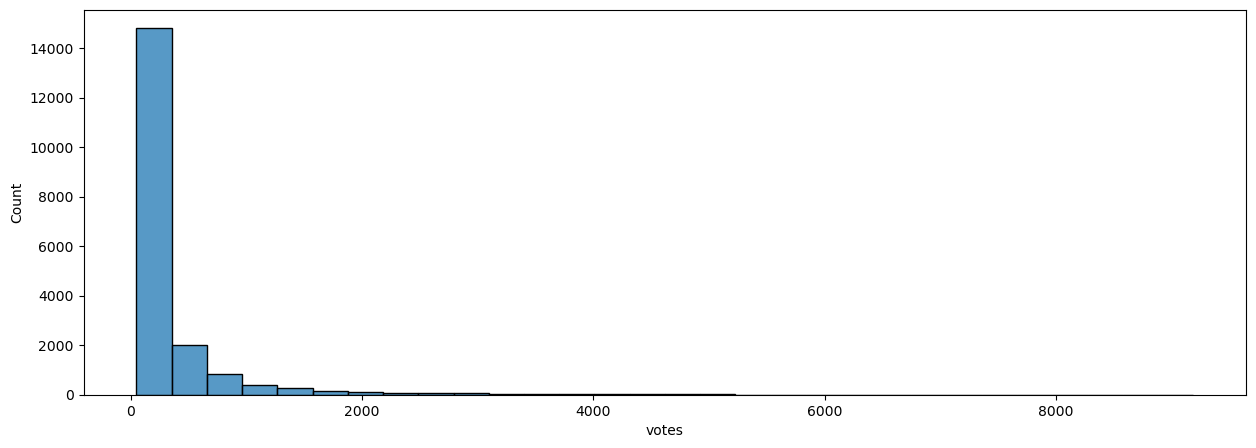

In [77]:
plt.figure(figsize=(15,5))
sns.histplot(data=df_ratings[df_ratings['votes']>50], x='votes', bins=30)

In [245]:
df_ratings.shape

(47330, 5)